In [33]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/study_results .csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Checking number of mice
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [34]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice 
data_check = combined_data.groupby(['Timepoint', 'Mouse ID']).count()
for index,row in data_check.iterrows():
    if row["Age_months"]>1:
        print(row)
        
# Dropping duplicate Mouse ID g898
clean_data = combined_data.loc[combined_data['Mouse ID'] != 'g989']

# Clean data
clean_data

Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (0, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (5, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (10, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (15, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (20, g989), dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Summary Statistics: Mean, Median, variance, standard deviation, and SEM, of tumor volume
regimen_df = clean_data.groupby('Drug Regimen')

mean_tumor = regimen_df['Tumor Volume (mm3)'].mean()

median_tumor = regimen_df['Tumor Volume (mm3)'].median()

std_tumor = regimen_df['Tumor Volume (mm3)'].std()

variance_tumor = regimen_df['Tumor Volume (mm3)'].var()

SEM_tumor = regimen_df['Tumor Volume (mm3)'].sem()

Summary_regimen_df = pd.DataFrame()
Summary_regimen_df['Mean'] = mean_tumor
Summary_regimen_df['Media'] = median_tumor
Summary_regimen_df['Standard Deviation'] = std_tumor
Summary_regimen_df['Variance'] = variance_tumor
Summary_regimen_df['SEM'] = SEM_tumor


Summary_regimen_df



,Mean,Media,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [37]:
# Summary Stats: Aggregate Method 

summary = regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])
summary


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


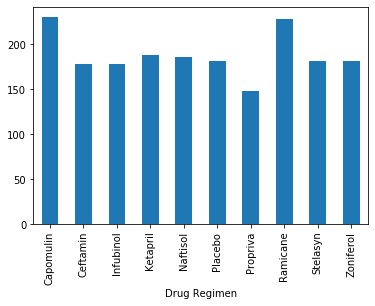

In [38]:
# Bar and Pie Charts 

# Count the number of time points for each Drug Regimen
timepoints = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Pandas Bar Chart
timepoints.plot.bar()
plt.show()




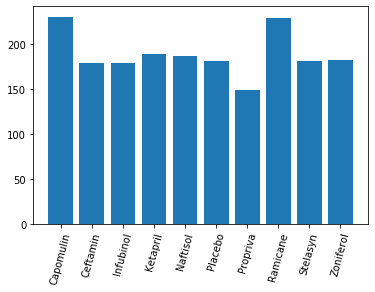

In [39]:
# Matplotlib bar chart
x_axis = list(timepoints.index)
y_axis = timepoints.tolist()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=75)
plt.show()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

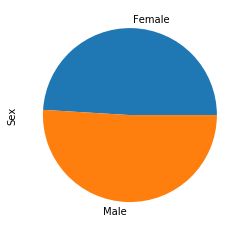

In [40]:
# Pie Charts

# Male versus Female count
Sex_df = clean_data.groupby(['Sex'])['Sex'].count()

# Pandas Pie Chart

sex_pie_chart = Sex_df.plot.pie()
Sex_df


([<matplotlib.patches.Wedge at 0x7fc7890eeba8>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

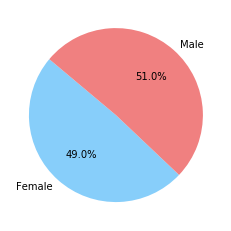

In [41]:
# Matplotlib Pie Chart
labels = ["Female", "Male"]
colors = ["lightskyblue", "lightcoral"]
plt.pie(Sex_df, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)


In [42]:
# Quartiles, Outliers, Boxplots
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Greatest time point for each mouse
max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()
    
max_timepoint = pd.DataFrame(max_timepoint).reset_index()

# Merged dataframes for the final tumor volume at the max timepoint for each mouse
merged_df = clean_data.merge(max_timepoint, on=['Mouse ID', 'Timepoint'])

# Display
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []


# Locate the rows which contain mice on each drug and get the tumor volumes
# for index,row in merged_df.iterrows():
#     if row["Drug Regimen"] == 'Capomulin':
#         tumor_capomulin.append(row['Tumor Volume (mm3)'])
#     if row["Drug Regimen"] == 'Ramicane':
#         tumor_ramicane.append(row['Tumor Volume (mm3)'])
#     if row["Drug Regimen"] == 'Infubinol':
#         tumor_infubinol.append(row['Tumor Volume (mm3)'])
#     if row["Drug Regimen"] == 'Ceftamin':
        
        

     

In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin Calculations

# Quantile values of the final tumor volume for Capomulin
cap_values = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
quartiles = cap_values.quantile([.25,.5,.75])
tumor_quartile = quartiles["Tumor Volume (mm3)"]

# Quartiles
cap_lowerq = tumor_quartile[0.25]
cap_upperq = tumor_quartile[0.75]
cap_medianq = tumor_quartile[0.5]
cap_iqr = cap_upperq - cap_lowerq

# Lower and upper bound outliers
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin values below {cap_lower_bound} could be outliers.")
print(f"Capomulin Values above {cap_upper_bound} could be outliers.")


# No outliers for Capomulin
cap_upper_outliers = cap_values.loc[cap_values['Tumor Volume (mm3)'] > 63.525]
cap_lower_outliers = cap_values.loc[cap_values['Tumor Volume (mm3)'] < 9.01]

cap_values_list = cap_values['Tumor Volume (mm3)'].values.tolist()

cap_values_list

Capomulin values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.


[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [62]:
# Ramicane Calculations

# Quantile values of the final tumor volume for Ramicane
ram_values = merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']
quartiles = ram_values.quantile([.25,.5,.75])
tumor_quartile = quartiles["Tumor Volume (mm3)"]

# Quartiles
ram_lowerq = tumor_quartile[0.25]
ram_upperq = tumor_quartile[0.75]
ram_medianq = tumor_quartile[0.5]
ram_iqr = ram_upperq - ram_lowerq

# Lower and upper bound outliers
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane values below {ram_lower_bound} could be outliers.")
print(f"Ramicane Values above {ram_upper_bound} could be outliers.")

# No outliers for Ramicane
ram_upper_outliers = ram_values.loc[ram_values['Tumor Volume (mm3)'] > 64.025]
ram_lower_outliers = ram_values.loc[ram_values['Tumor Volume (mm3)'] < 8.19]

# Converting values into a list to plot
ram_values_list = ram_values['Tumor Volume (mm3)'].values.tolist()
ram_values_list

Ramicane values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.


[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.56046955,
 31.09533505,
 33.39765251,
 32.97852192,
 33.56240217,
 36.13485243,
 38.81036633,
 37.22565033,
 36.37451039,
 36.56165229,
 37.31123552,
 38.34200823,
 38.407618299999996,
 40.65900627,
 40.66771292,
 45.22086888,
 43.04754260000001,
 43.41938077,
 43.16637266,
 44.18345092]

In [63]:
# Infubinol Calculations

# Quantile values of the final tumor volume for Infubinol
inf_values = merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']
quartiles = inf_values.quantile([.25,.5,.75])
tumor_quartile = quartiles["Tumor Volume (mm3)"]

# Quartiles
inf_lowerq = tumor_quartile[0.25]
inf_upperq = tumor_quartile[0.75]
inf_medianq = tumor_quartile[0.5]
inf_iqr = inf_upperq - inf_lowerq

# Lower and upper bound outliers
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol values below {inf_lower_bound} could be outliers.")
print(f"Infubinol Values above {inf_upper_bound} could be outliers.")

# No outliers for Infubinol
inf_upper_outliers = inf_values.loc[inf_values['Tumor Volume (mm3)'] > 88.025]
inf_lower_outliers = inf_values.loc[inf_values['Tumor Volume (mm3)'] < 30.68]

# Converting values into a list to plot
inf_values_list = inf_values['Tumor Volume (mm3)'].values.tolist()
inf_values_list

Infubinol values below 36.83290494999999 could be outliers.
Infubinol Values above 82.74144559000001 could be outliers.


[67.97341878,
 65.52574285,
 57.03186187,
 66.08306589,
 72.2267309,
 36.321345799999996,
 60.96971133,
 62.43540402,
 60.91876652,
 67.28962147,
 66.19691151,
 62.11727887,
 47.01036401,
 60.16518046,
 55.62942846,
 45.69933088,
 54.65654872,
 55.65068132,
 46.25011212,
 54.04860769,
 51.54243058,
 50.00513807,
 58.26844248,
 67.68556862,
 62.75445141]

In [64]:
# Ceftamin Calculations

# Quantile values of the final tumor volume for Ceftamin
cef_values = merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']
quartiles = cef_values.quantile([.25,.5,.75])
tumor_quartile = quartiles["Tumor Volume (mm3)"]

# Quartiles
cef_lowerq = tumor_quartile[0.25]
cef_upperq = tumor_quartile[0.75]
cef_medianq = tumor_quartile[0.5]
cef_iqr = cef_upperq - cef_lowerq

# Lower and upper bound outliers
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin values below {cef_lower_bound} could be outliers.")
print(f"Ceftamin Values above {cef_upper_bound} could be outliers.")

# No outliers for Ceftamin
cef_upper_outliers = cef_values.loc[cef_values['Tumor Volume (mm3)'] > 87.66]
cef_lower_outliers = cef_values.loc[cef_values['Tumor Volume (mm3)'] < 25.35]

# Converting values into a list to plot
cef_values_list = cef_values['Tumor Volume (mm3)'].values.tolist()
cef_values_list

Ceftamin values below 25.355449580000002 could be outliers.
Ceftamin Values above 87.66645829999999 could be outliers.


[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.784681799999994,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

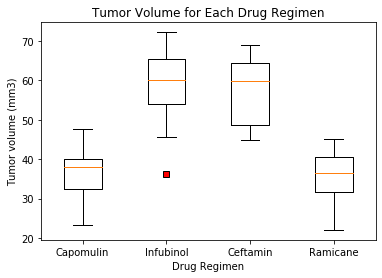

In [65]:
# Boxplot of final tumor volume 
boxplot_values = [cap_values_list, inf_values_list, cef_values_list, ram_values_list]

# Formatting 
fig1, ax1 = plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax1.set_title('Tumor Volume for Each Drug Regimen')
ax1.set_ylabel('Tumor volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(boxplot_values, flierprops=red_square)
plt.xticks([1,2,3,4],['Capomulin', 'Infubinol','Ceftamin', 'Ramicane'])

# Display
plt.show()


Text(0.5, 1.0, 'Tumor Size of Mouse s185 Over a Period of Time')

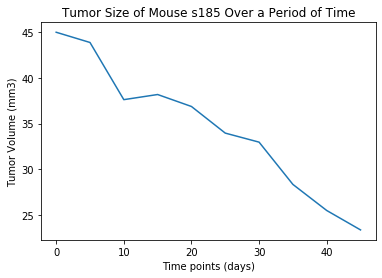

In [58]:
# Line Plot: Tumor Size over period of Time

# Lock a row and columns for an individual mouse treated with Capomulin
mouse_data = clean_data.loc[clean_data['Mouse ID'] == 's185']
mouse_data

# Assign x and y values
x_axis = mouse_data['Timepoint']
y_axis = mouse_data['Tumor Volume (mm3)']

# Plot and Format
plt.plot(x_axis, y_axis)
plt.xlabel("Time points (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size of Mouse s185 Over a Period of Time")

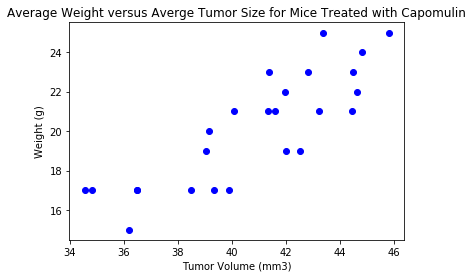

In [75]:
# Scatter plot: Tumor Size versus Timepoints

# Lock data for mice treated with Capomulin
cap_mice = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Grouped the data by 'Mouse ID'
cap_mice_grouped = cap_mice.groupby(['Mouse ID'])

# Average tumor size and individual weight of each mouse
avg_tumor_size = cap_mice_grouped['Tumor Volume (mm3)'].mean()
weight = cap_mice_grouped['Weight (g)'].mean()

# Formatting
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Average Weight versus Averge Tumor Size for Mice Treated with Capomulin')
plt.scatter(avg_tumor_size, weight, marker="o", facecolors="blue", edgecolors="blue")
           


In [60]:
# Correlation Coefficient

# Calculation
correlation = st.pearsonr(avg_tumor_size,weight)
# Print Results
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [311]:
# Linear Regression Model 

# Linear Regression Formulat
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_size,weight)
regress_values = avg_tumor_size * slope + intercept

# Print Results
print(f"The linear regression results are {(slope, intercept, rvalue, pvalue, stderr)}")



The linear regression results are (0.7426941826944178, -10.148863164111322, 0.8419363424694718, 1.3225722434712642e-07, 0.09924763572688564)
